## **Εξαγωγή χαρακτηριστηκών ήχου**

**Πλήθος μηδενικών διασταυρώσεων (Zero-crossing rate)**



In [12]:
#Εισαγωγή βιβλιοθηκών

import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt

from scipy import signal

In [3]:
#Αρχικοποίηση μήκους πλαισίου,μήκους βήματος 
FRAME_SIZE=512 
HOP_LENGTH=256

#Όταν το βήμα είναι μισό του μήκους πλαισίου έχουμε 50% επικάλυψη πλαισίων

> H βιβλιοθήκη [librosa](https://librosa.org/doc/latest/index.html) μας δίνει την δυνατότητα να φορτώσουμε ένα αρχείο ήχου με την εντολή [librosa.load](https://librosa.org/doc/main/generated/librosa.load.html) συναρτήσει του χρόνου.

In [4]:
#Αρχικοποίηση αρχείων/δειγμάτων
filename= librosa.ex('trumpet')
audio_sample, sr =librosa.load(filename)

*Αν θέλαμε να φορτώσουμε κάποιο αρχείο ήχου από τον υπολογιστή μας τότε:*


```
 audiofile_path="/user/yourpcname/desktop/filename.wav"
 audio_sample, sr =librosa.load(audiofile_path)

```











> Στην συνέχεια μπορούμε να αναπαράγουμε το σήμα μέσω της βιβλιοθήκης [IPython](https://ipython.org/).



In [5]:
#Αναπαραγωγή ήχου
ipd.Audio(data=audio_sample,rate=sr)

> **Υπολογισμός Πλήθος μηδενικών διασταυρώσεων (ZCR) με την βιβλιοθήκη [librosa](https://librosa.org/doc/latest/index.html).**




> Για πηγαίο κώδικα [librosa.feature.zcr](https://librosa.org/doc/main/generated/librosa.feature.zero_crossing_rate.html)

In [7]:
zcr_audio_sample=librosa.feature.zero_crossing_rate(audio_sample,frame_length=FRAME_SIZE,hop_length=HOP_LENGTH)[0]

Text(0.5, 1.0, 'Trumpet sample zero crossing rate with the librosa function')

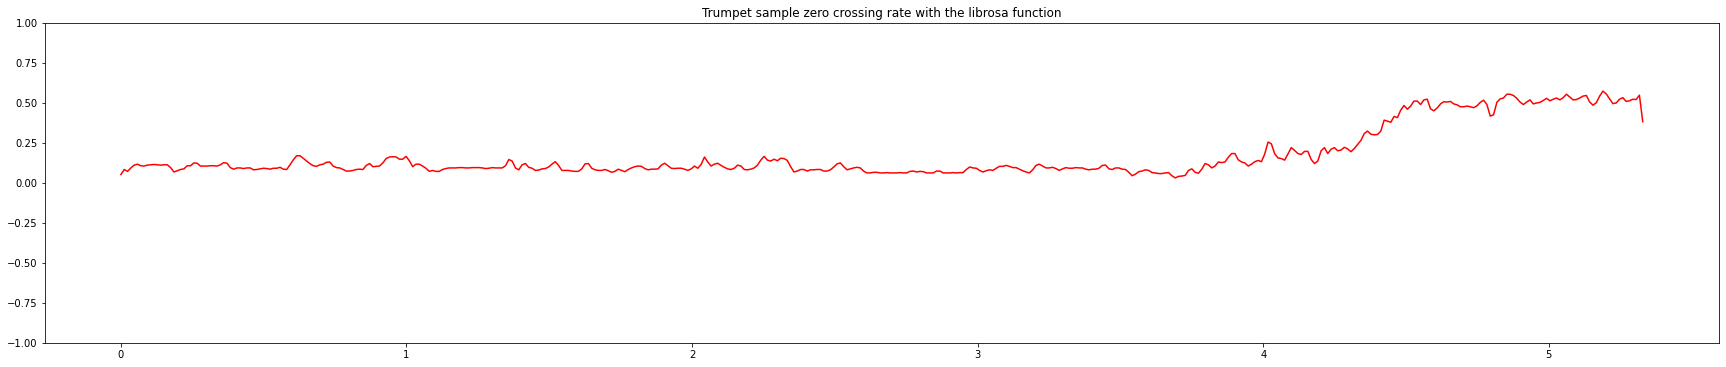

In [34]:
#Μετατροπή πλαισίων σε χρόνο
frames = range(len(zcr_audio_sample))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

#Ορισμός μεγέθους διαγράμματος
plt.figure(figsize=(30, 20))
ax = plt.subplot(3, 1, 1)

#Γραφική αναπαράσταση του πλήθους μηδενικών διασταυρώσεων συναρτήσει του χρόνου
plt.plot(t, zcr_audio_sample, color="r")
plt.ylim((-1, 1))
plt.title("Trumpet sample zero crossing rate with the librosa function")

> **Υπολογισμός πλήθους μηδενικών διασταυρώσεων με δική μας συνάρτηση**


> Για να υπολογίσουμε το πλήθος μηδενικών διασταυρώσεων ολόκληρου του σήματος, το χωρίζουμε σε πλαίσια και υπολογίζουμε το πλήθος για κάθε πλαίσιο ως: Σ|sgn[x(m)]-sng[x(m-1)]w[n-m]| όπου w κατάλληλη συνάρτηση παραθύρωσης(εξαρτάται από την εφαρμογή).





In [14]:
#Ορισμός συνάρτησης πλήθους μηδενικών διασταυρώσεων 
def calcZcr(y,frame_size=512,hop_length=512):
    #Συνάρτηση υπολογισμού προσήμου
    sign = lambda a:(a>=0)-(a<0)
    #Δημιπυργία κενής λίστας
    zcr =[]
    #Υπολογισμός πλήθους μηδ.διασταυρώσεων για κάθε πλαίσιο
    for i in range (0,len(y),hop_length):
        zcr_cf=0
        for k in range (i,i+frame_size,1):
            if k<len(y)-1:
                if sign(float(y[k]))!=sign(float(y[k+1])):
                    zcr_cf+=1
        zcr.append((zcr_cf))
    #Επιστρέφει το πλήθος των μηδ.διασταυρώσεων για κάθε πλαίσιο
    return np.array(zcr)

In [15]:
#Ορισμός συνάρτησης εφαρμογής παραθύρου 
def window_signal(y,frame_size=512,hop_length=512,window='hann'):
    frames=0
    wS=np.array([])
    wFrame=[]
    w=np.array(signal.get_window(window, frame_size))
    for i in range (0,len(y),hop_length):
        if (i+hop_length)<len(y):
                cur_wS = y[i:i+frame_size]*w
                frames+=1
        else:
            cur_wS = y[i:len(y)]*w[0:(len(y)-i)]
            frames+=1
        wS = np.concatenate((wS, cur_wS))
        wFrame.append(cur_wS)
    #Επιστρέφει 1)ΤΟ παραθυρωμένο σήμα(wS) 2)τα παραθυρωμένα frames wFrames
    return wS,wFrame

In [31]:
#Υπολογισμός ZCR ενέργειας με δική μας συνάρτηση
my_zcr_audio_sample = calcZcr(audio_sample, FRAME_SIZE, HOP_LENGTH)

Text(0.5, 1.0, 'Trumpet sample zero crossing rate with our function')

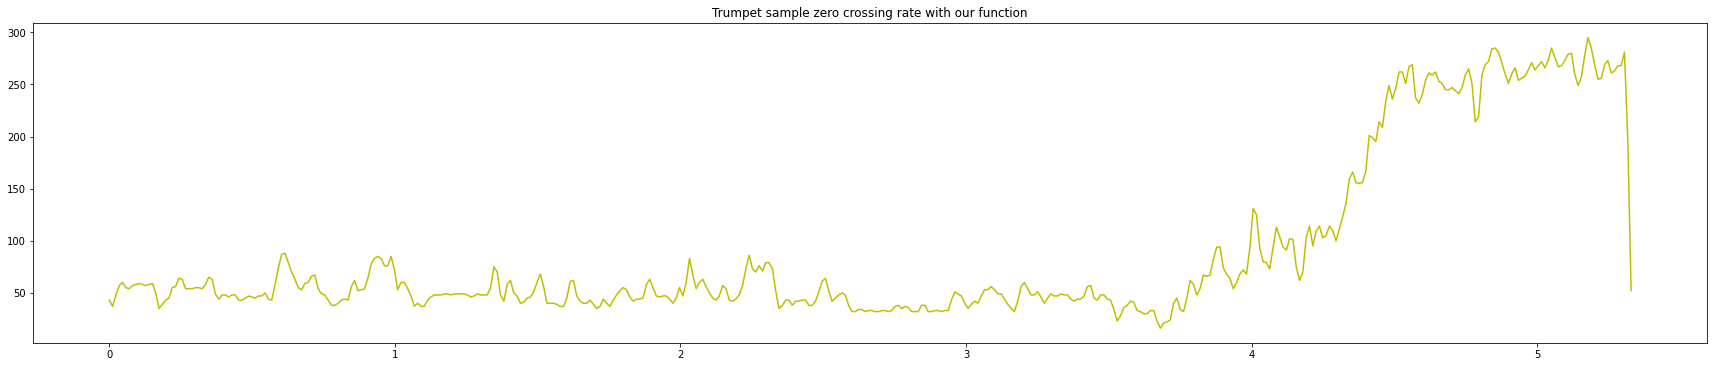

In [35]:
#Μετατροπή πλαισίων σε χρόνο
frames = range(len(my_zcr_audio_sample))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

#Ορισμός μεγέθους διαγράμματος
plt.figure(figsize=(30, 20))
ax = plt.subplot(3, 1, 1)

#Γραφική αναπαράσταση του πλήθους μηδενικών διασταυρώσεων συναρτήσει του χρόνου
plt.plot(t, my_zcr_audio_sample, color="y")
plt.title("Trumpet sample zero crossing rate with our function")